# Lecture 4: Stochastic Gradient Ascent
***

<img src="http://grandmaster.colorado.edu/~cketelsen/files/csci5622/notebooks/lesson04/mountains.jpg",width=1100,height=50>

### Problem 1: Unregularized Stochastic Gradient Ascent on Text Data 
***

Suppose you have two messages, the first labeled positive (y = 1) and the second labeled negative (y = 0):

| POS Message | NEG Message  | 
|:-----------:|:------------:|
| AAAABBBC    |  BBCCCD      |

**Q**: Your first task is to encode the messages into feature vectors using the Bag-of-Words approach.  You may assume that "A", "B", "C", and "D" are the  only symbols in the vocabulary.  Don't forget to add a feature corresponding to the **bias** term!  

**A**: Labeling the POS message ${\bf x}_1$ and the NEG message ${\bf x}_2$ we have $
{\bf x}_1 = 
\left[
\begin{array}
~ 1 \\
4 \\
3 \\
1 \\
0
\end{array}
\right]
~~ \textrm{and} ~~
{\bf x}_2 = 
\left[
\begin{array}
~ 1 \\
0 \\
2 \\
3 \\
1 \\
\end{array}
\right]
$

**Q**: Your next task is to do one full pass through the data with **unregularized** SGA with the initial weight vector ${\bf w}$ set to zero and the learning rate set to $\eta = 1.0$.  You may assume that after the shuffle the order is POS then NEG.  

**A**: Working only with ${\bf x}_1$ we have 

$$
y_1 = 1 \quad \quad \textrm{sigm}({\bf w}^T{\bf x}_1) = \frac{1}{1 + \exp[-(0 + 0 + 0 + 0 + 0)]} = \frac{1}{2}  \quad \quad [y_1 - \textrm{sigm}({\bf w}^T{\bf x})] = 1 - \frac{1}{2} = \frac{1}{2}
$$

<br>

$$
\nabla_{\bf w}\ell({\bf w}) = \left[ y_1 - \textrm{sigm}({\bf w}^T{\bf x}_1)\right]{\bf x}_1 = \frac{1}{2}
\left[
\begin{array}
~ 1 \\
4 \\
3 \\
1 \\
0
\end{array}
\right]
= 
\left[
\begin{array}
~ 0.5 \\
2 \\
1.5 \\
0.5 \\
0
\end{array}
\right]
\quad \Rightarrow \quad {\bf w} \leftarrow {\bf w} + \eta \nabla_{\bf w}\ell({\bf w}) = 
\left[
\begin{array}
~ 0 \\
0 \\
0 \\
0 \\
0
\end{array}
\right]
+ 1.0 
\left[
\begin{array}
~ 0.5 \\
2 \\
1.5 \\
0.5 \\
0
\end{array}
\right]
= 
\left[
\begin{array}
~ 0.5 \\
2 \\
1.5 \\
0.5 \\
0
\end{array}
\right]
$$

Now working with ${\bf x}_2$ we have 

$$
y_2 = 0 \quad \quad \textrm{sigm}({\bf w}^T{\bf x}_2) = \frac{1}{1 + \exp[-(1\cdot 0.5 + 0\cdot 2 + 2 \cdot 1.5 + 3 \cdot 0.5 + 1\cdot 0)]} = 0.993  \quad \quad [0 - \textrm{sigm}({\bf w}^T{\bf x})] = 0 - 0.993 = -0.993
$$

<br>

$$
\nabla_{\bf w}\ell({\bf w}) = \left[ y_2 - \textrm{sigm}({\bf w}^T{\bf x}_2)\right]{\bf x}_2 = -0.993 
\left[
\begin{array}
~ 1 \\
0 \\
2 \\
3 \\
1
\end{array}
\right]
= 
\left[
\begin{array}
~ -0.993 \\
~~~~0 \\
-1.987 \\
-2.980 \\
-0.993
\end{array}
\right]
\quad \Rightarrow \quad {\bf w} \leftarrow {\bf w} + \eta \nabla_{\bf w}\ell({\bf w}) = 
\left[
\begin{array}
~ 0.5 \\
2.0 \\
1.5 \\
0.5 \\
0
\end{array}
\right]
+ 1.0 
\left[
\begin{array}
~ -0.993 \\
~~~~0 \\
-1.987 \\
-2.980 \\
-0.993
\end{array}
\right]
= 
\left[
\begin{array}
~ -0.493 \\
~~~~2.0 \\
-0.487 \\
-2.480 \\
-0.993
\end{array}
\right]
$$

<br>

So after one full pass through the data SGA has updated the weights to $
{\bf w} = 
\left[
\begin{array}
~ -0.493 \\
~~~~2.0 \\
-0.487 \\
-2.480 \\
-0.993
\end{array}
\right]
$

$\square$

### Problem 2: A More Efficient Regularization 
***

Recall that we commonly include in the log-likelihood function a regularization term (on all weights except for the bias) of the form $-\lambda \sum_{k=1}^D w_k^2$.   Incidentally, there are many forms of regularization.  This one is called L2-regularization because it can also be written as $-\lambda\|{\bf w}_{1:D}\|_2^2$ where the norm here is the 2-norm or the *Euclidean* norm. For SGA this has the effect of including a term like $-2\lambda w_k$ in the $k^\textrm{th}$ component of the gradient. 

**Q**: Why might this be terribly inefficient, especially in the context of text learning? 

**A**: Remember that the features in text learning with the Bag-of-Words model are all of the words in the vocabulary.  Since most documents will not have anywhere near the number of words in the vocabulary, feature vectors in text learning tend to be **very** sparse.  Furthermore, since $\nabla_{\bf w}\ell({\bf w})$ is effectively a multiple of the feature vector ${\bf x}_i$, it will have the same sparsity pattern (i.e. still a ton of zeros).  This means that in unregularized SGA there is no need to update the weight vector corresponding to features that are zero in ${\bf x}_i$  (we often call these **zero-dimensions** or **zero-features**). 

Now, when we add regularization to the mix, it complicates matters.  The features affected by regularization are the features where the **weight vector** is nonzero.  By the end of training a Logistic Regression model on a large document corpus, a great many entries in the weight vector will likely be nonzero. If we include regularization in the update, we'll have to update tremendously more features in ${\bf w}$ than just the nonzero features from ${\bf x}_i$ at each step.   

A workaround for this is to use a *slightly* different form of L2 regularization, which we now describe.  

Consider the update step for the $k^\textrm{th}$ component of the weight vector in SGA with regularization.  It looks like

$$
w_k \leftarrow w_k + \eta\left([y_i - \textrm{sigm}({\bf w}^T{\bf x}_i)]x_{ik} - 2\lambda w_k \right)
 = (w_k + \eta[y_i - \textrm{sigm}({\bf w}^T{\bf x}_i)]x_{ik}) - 2\eta\lambda w_k 
$$

We're going to break the update up into two parts.  First we'll do the unregularized gradient update for $k$ corresponding only to **nonzero-features** in ${\bf x}_i$: 

$$
w_k \leftarrow w_k + \eta[y_i - \textrm{sigm}({\bf w}^T{\bf x}_i)]x_{ik}
$$

And then (in theory) we'll do the regularization update as follows 

$$
w_k \leftarrow w_k - 2\eta \lambda w_k = w_k (1 - 2\eta \lambda)  
$$

**Q**: Look carefully at the two update steps.  Why is this not the same as standard L2-regularization? 

**A**: If this was standard L2-regularization the two $w_k$'s that appear on the right-hand side of the second update step would be different.  The first instance of $w_k$ is the one that's been updated with the log-likelihood gradient and the second one should technically be the un-updated value.  In this version of regularization we're regularizing on the already updaged value of $w_k$. 

OK, so far this doesn't look very helpful.  It seems like we still need to do the second update step for nonzero-weights, even if the $k^\textrm{th}$ feature is a zero-feature. It turns out that we can actually hold off on doing the regularization update for a weight until the time when we have to do a gradient update as well.  

The property of the update that makes this possible is that the regularization update is **multiplicative**.  This means that doing **three** updates of the form 

$$
\begin{array}{c}
~ w_k \leftarrow w_k (1 - 2\eta \lambda) \\
~ w_k \leftarrow w_k (1 - 2\eta \lambda) \\
~ w_k \leftarrow w_k (1 - 2\eta \lambda) \\
\end{array}
$$

is equivalent to 

$$
w_k \leftarrow w_k (1 - 2\eta \lambda)^3
$$

This means that we can hold off on doing the regularization update for the $k^\textrm{th}$ weight until we encounter a training example that has a $k^{\textrm{th}}$ nonzero feature.  The regularization update is then performed where the **shrinkage factor** is raised to the power of the number of iterations since the feature was last updated. 

The only mechanism we need to do this is a data structure to keep track of the last iteration that a particular component of the weight vector was updated.  Typically this is done with a hash table.  In your next homework assignment you'll use a dictionary. 

This processes is called **Lazy Sparse Regularization** and you can read more about it in a slightly different context <a href="https://lingpipe.files.wordpress.com/2008/04/lazysgdregression.pdf">here</a>. 

**Q**: Redo Problem 1 with Lazy Sparse Regularization with $\lambda = \frac{1}{4}$.

**A**: The first gradient update step for example ${\bf x}_1$ does not change.  So after the gradient update but before regularization we have: 
$
{\bf w} = 
\left[
\begin{array}
~ 0.5 \\
~~2 \\
1.5 \\
0.5 \\
~~ 0
\end{array}
\right]
$

The shrinkage factor is $(1 - 2\eta \lambda) = 0.5$.  Now, in applying the regularization, remember we don't regularize the bias term, and we don't (right now) regularize weights associated with zero-features, which in this case is $k = 4$ (associated with letter D).  So the new update looks as follows (remember, we're indexing by zero here): 

$$
\begin{array}{rcccl}
w_1 & \leftarrow & 2 \cdot 0.5 & = & 1 \\
w_2 & \leftarrow & 1.5 \cdot 0.5 & = & 0.75 \\
w_3 & \leftarrow & 0.5 \cdot 0.5 & = & 0.25 \\
\end{array}
\quad \Rightarrow \quad 
{\bf w} = 
\left[
\begin{array}
~ 0.5 \\
~~~1 \\
0.75 \\
0.25 \\
~~~0
\end{array}
\right]
$$

OK, so now we have a different weight vector, and thus a different gradient update than we had in problem 1.  We have 

$$
y_2 = 0, \quad \quad [y_2 - \textrm{sigm}({\bf w}^T{\bf x}_2)] = [0 - \textrm{sigm}(.5 \cdot 1 + 1 \cdot 0 + 0.75 \cdot 2 + 0.25 \cdot 3 + 0.25 0 \cdot 1)] = -0.940 
$$

Performing the gradient update on **only** the features that are nonzero, we have 


$$
\begin{array}{rcccl}
w_0 & \leftarrow & 0.5  + -0.940 \cdot 1 & = & -0.440 \\
w_2 & \leftarrow & 0.75 + -0.940 \cdot 2 & = & -1.13 \\
w_3 & \leftarrow & 0.25 + -0.940 \cdot 3 & = & -2.57 \\
w_4 & \leftarrow & 0  + -0.940 \cdot 1 & = & -0.940 \\
\end{array}
\quad \Rightarrow \quad 
{\bf w} = 
\left[
\begin{array}
~-0.440 \\
~~~~1 \\
-1.13 \\
-2.56 \\
-0.940
\end{array}
\right]
$$


Now we perform the regularization.  Three things to keep in mind: $w_0$ is the bias weight, so we will not regularize it.  $w_1$ corresponds to a zero-feature in ${\bf x}_2$ so we will not regularize it **now**.  Finally, $w_4$ was not regularized on the previous iteration, so this time we will regularize it twice.  

$$
\begin{array}{rcccl}
w_2 & \leftarrow & -1.13  \cdot 0.5 & = & -0.565 \\
w_3 & \leftarrow & -2.57  \cdot 0.5 & = & -1.285 \\
w_4 & \leftarrow & -0.940 \cdot (0.5)^2 & = & -0.235 & 
\end{array}
\quad \Rightarrow \quad 
{\bf w} = 
\left[
\begin{array}{r}
-0.440 \\
~~~~1 \\ 
-0.565 \\
-1.285 \\
-0.235 & 
\end{array}
\right]
$$

### Problem 3: The Learning Rate Schedule Game
***

In the case when your log-likelihood function is convex, the choice of learning rate mainly affects the convergence of your SGA routine.  In a nonconvex problem, the choice of learning rate can determine whether you find the global maximum, or get stuck forever in a local maximum.  In most sophisticated optimization routines, the learning rate is adapted over time.  Varying learning rate schedules allow you to explore local maximums but still be able to make it out and eventually find the global maximum.  

The following game is a cheap facsimile of stochastic gradient ascent.  There is no log-likelihood function, or training set.  You just have a simple function that you would like to maximize, namely 

$$
f(x,y) = \sin(3 \pi x) ~ \sin(3 \pi y) + 3~\textrm{exp}\left[{-\left(x-\frac{1}{2}\right)^2 - \left(y-\frac{1}{2}\right)^2}\right]
$$

The surface looks as follows.  Notice that there is a global maximum at $(1/2,1/2)$ and several local maxima and minima surrounding it. 


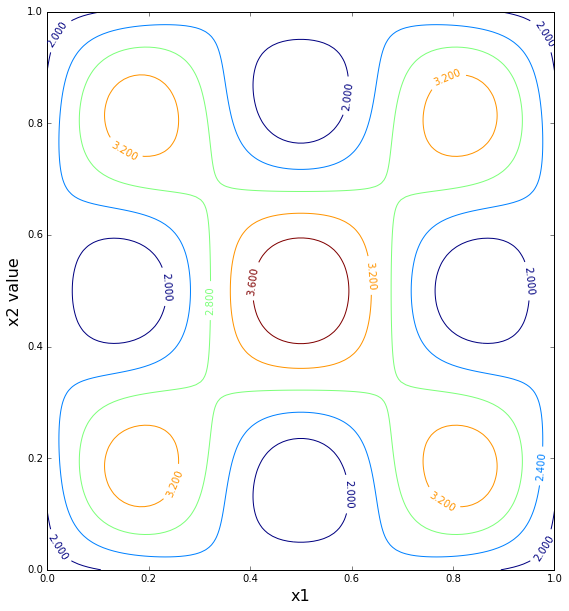

In [4]:
plotsurface()

I've given you a starting point and a basic gradient ascent algorithm (located in the Helper Functions section below).  Below this text there is a learning rate scheduling function that currently just returns the initial learning rate that you perscribe.  The goal of this game is for you to adjust the initial learning rate and the scheduling function that allows the iterate to make it to the global maximum.  The **only** things you're allowed to change are the **initial learning rate** and the **schedule function**.   Before you can play you need to evaluate the code-blocks at the bottom of the page.  Then come back and evaluate the $\texttt{playgame}$ function with it's current inputs and see what happens! 

In [38]:
def schedule(k, n, eta0):
    '''
    :param k: The current iteration 
    :param n: The max number of iterations
    :param eta0: The original learning rate 
    '''
    eta0 = eta0/(1+3*(k/(n+1)))
    return eta0 

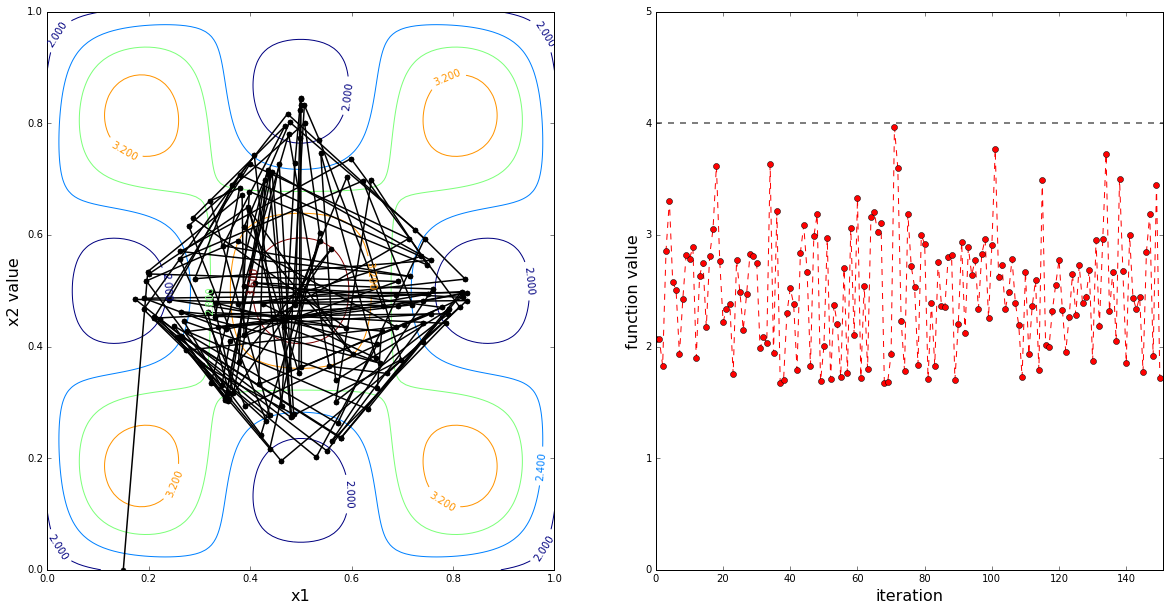

In [39]:
playgame(np.array([0.15,0.0]), 150, .05)

<br><br><br><br><br>
<br><br><br><br><br>
<br><br><br><br><br>
<br><br><br><br><br>
<br><br><br><br><br>
<br><br><br><br><br>

***
**Hint**: If you're not having much luck, try implementing a schedule of the form 
$
\eta_k = \dfrac{\eta_0}{ 1 + \alpha ~ k~/~n}
$ where here $\alpha$ is a tuning parameter.  You'll probably also have to make your initial learning rate bigger. 
***

<br><br><br>
<br><br><br>
### Helper Functions
***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def myfun(x, y): 
    return np.sin(3*np.pi*x)*np.sin(3*np.pi*y) + 3*np.exp(-(x-.5)**2 - (y-.5)**2)

def mygrad(x):
    g1 = 3 * np.pi * np.cos(3*np.pi*x[0]) * np.sin(3*np.pi*x[1]) - 4 * (x[0]-.5) * np.exp(-(x[0]-.5)**2 - (x[1]-.5)**2)
    g2 = 3 * np.pi * np.sin(3*np.pi*x[0]) * np.cos(3*np.pi*x[1]) - 4 * (x[1]-.5) * np.exp(-(x[0]-.5)**2 - (x[1]-.5)**2)
    return np.array([g1, g2])

def SGA(x, numstep, eta0):
    '''
    :param x: Starting point 
    :param numstep: Total number iterations 
    :param eta0: Initial learning rate 
    '''
    xhist = np.zeros((numstep+1,2))
    xhist[0,:] = x 
    for kk in xrange(numstep):
        x = x + schedule(kk, numstep, eta0) * mygrad(x)
        xhist[kk+1,:] = x 
    return xhist

def playgame(x0, numstep, eta0):
    '''
    :param x0: The starting point 
    :param numstep: The total number of iterations to do 
    :param eta0: The original learning rate 
    '''
    xx, yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 200))
    Z = myfun(xx, yy)
    fig = plt.figure(figsize=(20,10))
    ax1 = fig.add_subplot(121)
    CS = plt.contour(xx, yy, Z)
    plt.clabel(CS, inline=1, fontsize=10)
    plt.xlim([0,1])
    plt.ylim([0,1])

    xhist = SGA(x0, numstep, eta0)
    
    fvals = np.zeros(numstep+1)
    fvals[0] = myfun(x0[0], x0[1])

    for ii in xrange(xhist.shape[0]-1):
        x0 = xhist[ii][0]
        y0 = xhist[ii][1]
        x1 = xhist[ii+1][0]
        y1 = xhist[ii+1][1]
        ax1.plot([x0, x1], [y0,y1], color="black", marker="o", lw=1.5, markersize=5)
        fvals[ii+1] = myfun(x0, y0)
        
    plt.xlabel("x1", fontsize=16)
    plt.ylabel("x2 value", fontsize=16)
        
    maxval = myfun(0.5,0.5)
        
    ax2 = fig.add_subplot(122)
    ax2.plot(fvals, 'r--', marker="o")
    ax2.plot([0, numstep+1], [maxval, maxval], 'k--', lw=2, alpha=0.5)
    plt.xlim([0,numstep+1])
    plt.ylim([0,1.25*maxval])
    plt.xlabel("iteration", fontsize=16)
    plt.ylabel("function value", fontsize=16);
    
def plotsurface():
    xx, yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 200))
    Z = myfun(xx, yy)
    fig = plt.figure(figsize=(20,10))
    ax1 = fig.add_subplot(121)
    CS = plt.contour(xx, yy, Z)
    plt.clabel(CS, inline=1, fontsize=10)
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel("x1", fontsize=16)
    plt.ylabel("x2 value", fontsize=16)